For n_clusters = 60 The average silhouette_score is : 0.41111063490829153


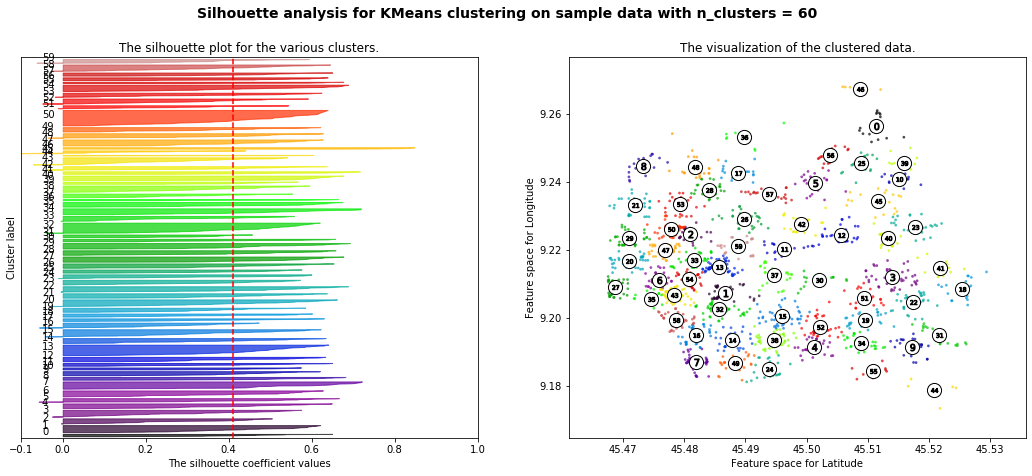

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from importlib import reload

import a2a_clustering
import a2a_validation
import a2a_travellingsalesman

a2a_clustering = reload(a2a_clustering)
a2a_validation = reload(a2a_validation)
a2a_travellingsalesman = reload(a2a_travellingsalesman)

###################
# CLUSTERING STEP #
###################

RANDOM_SEED = 0
n_clusters = 60
PATH = 'output/clustering/'
FILE_PREFIX = PATH + 'kmeans_santosh_' + str(n_clusters) + '_'

df = pd.read_csv("output/data_preparation/second_visit.20190903.csv")

X = a2a_clustering.transform(df)

clusterer = KMeans(n_clusters = n_clusters, random_state = RANDOM_SEED).fit(X)
cluster_labels = clusterer.labels_ 
df = df.assign(**{
    'Cluster_labels': cluster_labels
})    

centroid_csv = np.asarray(clusterer.cluster_centers_)
np.savetxt(FILE_PREFIX + "centroids.csv", 
    centroid_csv, 
    header="lat,lng", 
    delimiter=",", 
    comments='')

###################
# VALIDATION STEP #
###################

df = a2a_validation.silhouette(df, clusterer.cluster_centers_, FILE_PREFIX, "KMeans")
df.to_csv(FILE_PREFIX + "clusterized_dataset.csv")

###################
# TSP        STEP #
###################

tsp_solved = a2a_travellingsalesman.tsp(df, FILE_PREFIX)
tsp_solved.to_csv(FILE_PREFIX + 'tsp.csv')

In [3]:
tsp_solved

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,9.570200e+03,9 Km 570.20 m.,0:19:46,0:34:46,1186.600000,15.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,1.930400e+04,19 Km 304.00 m.,0:42:42,1:27:42,2562.800000,45.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,1.700330e+04,17 Km 3.30 m.,0:36:59,1:08:59,2219.600000,32.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,2.394240e+04,23 Km 942.40 m.,0:52:31,1:35:31,3151.200000,43.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,2.159140e+04,21 Km 591.40 m.,0:45:23,1:15:23,2723.100000,30.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
...,...,...,...,...,...,...,...,...
57,57,1.304380e+04,13 Km 43.80 m.,0:27:16,0:47:16,1636.900000,20.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
58,58,2.182740e+04,21 Km 827.40 m.,0:43:59,1:23:59,2639.500000,40.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
59,59,1.404350e+04,14 Km 43.50 m.,0:28:53,0:52:53,1733.200000,24.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
60,TOTAL,1.056378e+06,1056 Km 377.90 m.,"1 day, 13:16:10","2 days, 18:36:10",134170.600000,1760.000000,{}
